# session4

##### import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### read the dataset

In [3]:
dataset1 = pd.read_csv("gender_classification_v7.csv")
dataset1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


# heatmap

In [4]:
dataset1.drop("gender",inplace=True ,axis=1)
dataset1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


<Axes: >

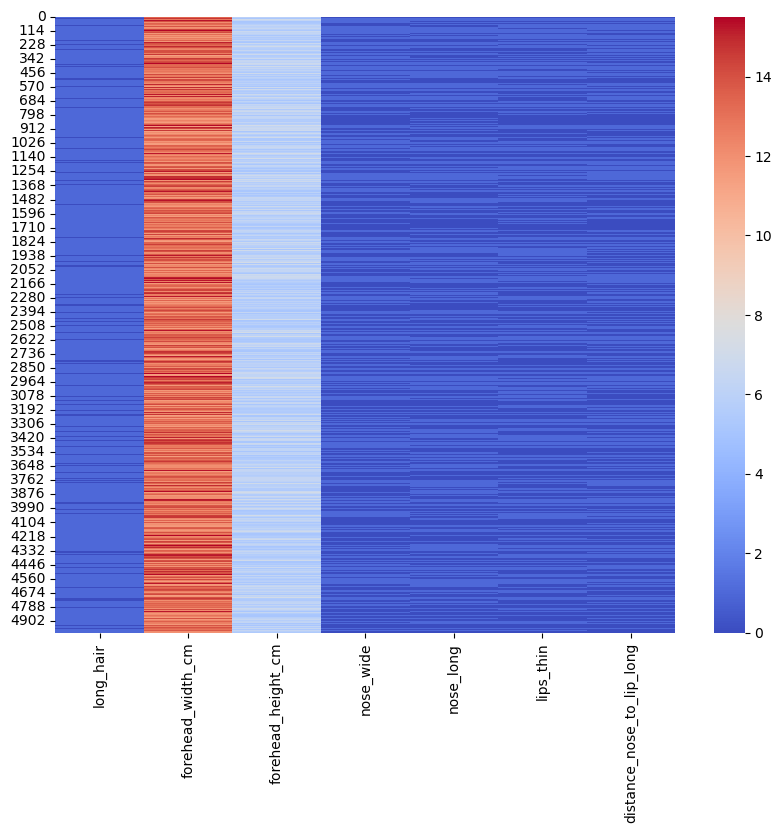

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset1,cmap='coolwarm')

<Axes: >

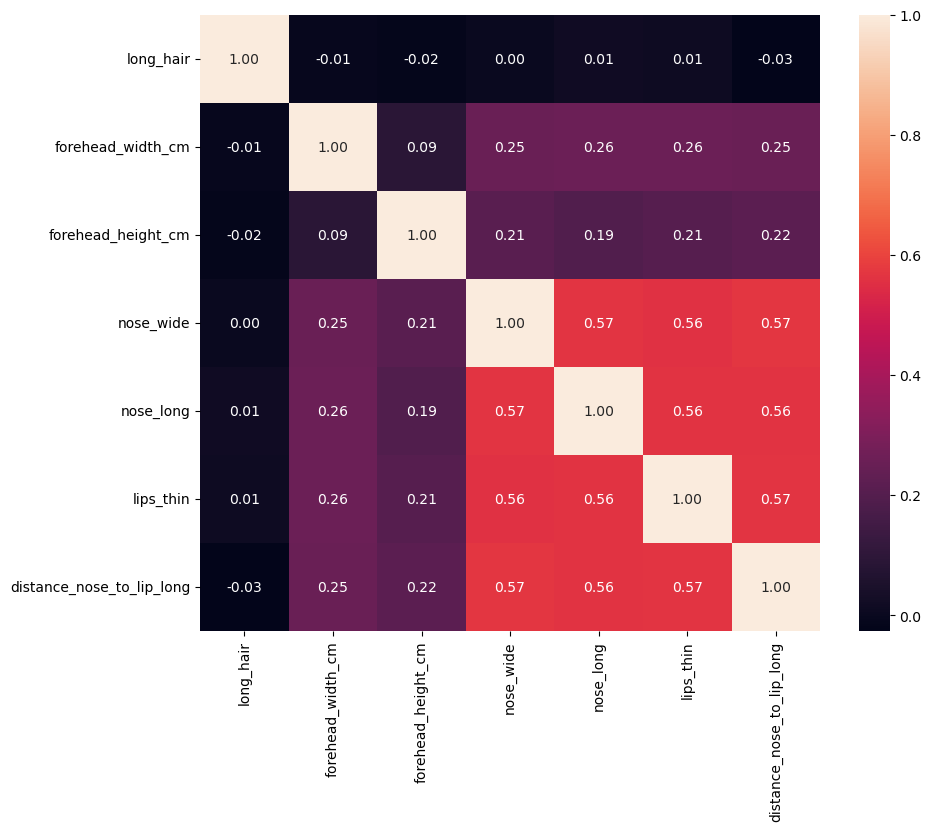

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset1.corr(),annot=True, fmt=".2f")

# train_test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = dataset1.iloc[:,0:7]
x.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [9]:
y = dataset1.iloc[:,6]
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: distance_nose_to_lip_long, Length: 5001, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 0.38655567 -0.79194941  1.212875   ...  0.97676975  1.01969389
   1.00050013]
 [-2.5869495   0.19860645 -0.82331486 ... -1.02378273 -0.98068647
  -0.99950012]
 [ 0.38655567 -1.24220208 -0.08288218 ...  0.97676975  1.01969389
   1.00050013]
 ...
 [ 0.38655567  0.19860645 -0.82331486 ... -1.02378273 -0.98068647
  -0.99950012]
 [ 0.38655567  0.46875805 -0.45309852 ...  0.97676975  1.01969389
   1.00050013]
 [ 0.38655567  1.72946552 -1.00842302 ...  0.97676975  1.01969389
   1.00050013]]


# KNN


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
x1 = dataset1.iloc[:,0:7]
x1.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
5,1,13.0,6.8,1,1,1,1
6,1,15.3,6.2,1,1,1,0
7,0,13.0,5.2,0,0,0,0
8,1,11.9,5.4,1,0,1,1
9,1,12.1,5.4,0,0,0,0


In [14]:
y1 = dataset1.iloc[:,6]
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

In [15]:
# Training the K-NN model on the Training set
KNN_classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

# Accuracy & Confusion_matrix

In [17]:
# Accuracy & Confusion_matrix
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score , f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy = ", accuracy_score(y_test,y_pred))

[[505   0]
 [  0 496]]
accuracy =  1.0


In [18]:
f1 = f1_score(y_test,y_pred,average=None)
print("f1_score = ", f1)
print("f1_score = ", f1.mean())

f1_score =  [1. 1.]
f1_score =  1.0


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

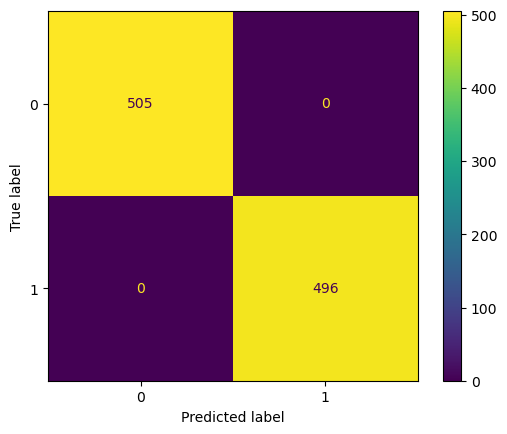

In [20]:
y2 = KNN_classifier.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(y2, x_test, y_test)

<Axes: >

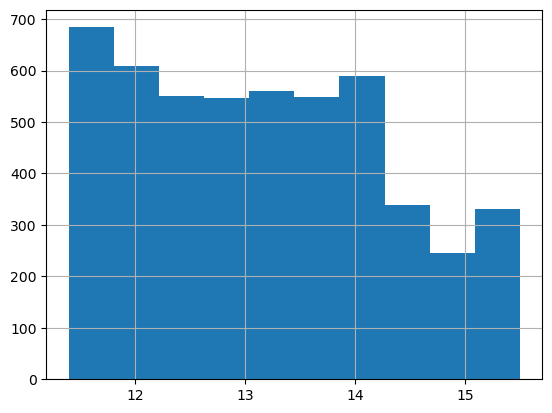

In [21]:
dataset1['forehead_width_cm'].hist()

<Axes: >

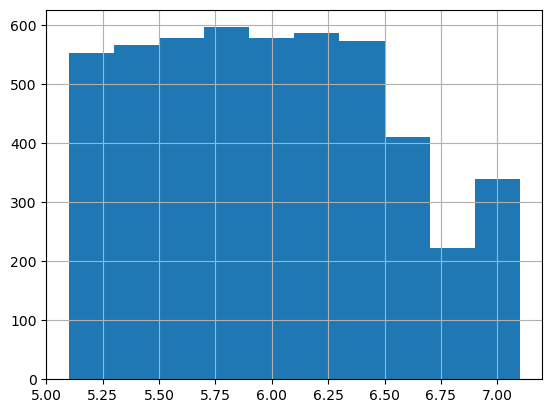

In [22]:
dataset1['forehead_height_cm'].hist()

<Axes: >

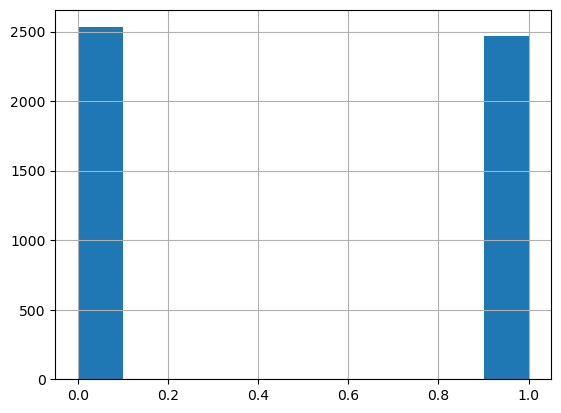

In [23]:
dataset1['nose_wide'].hist()

<Axes: >

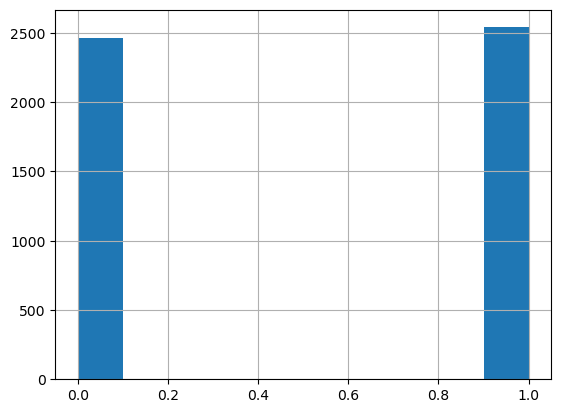

In [24]:
dataset1['nose_long'].hist()

<Axes: >

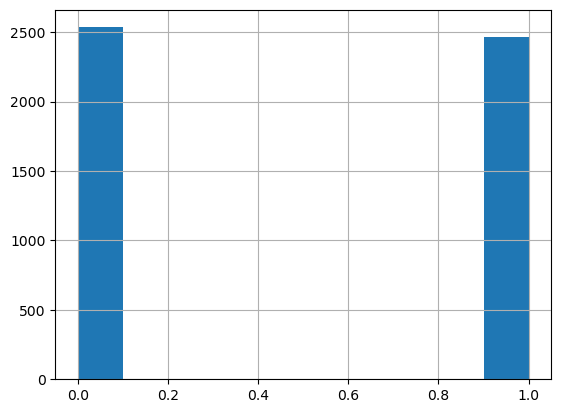

In [25]:
dataset1['lips_thin'].hist()

<Axes: >

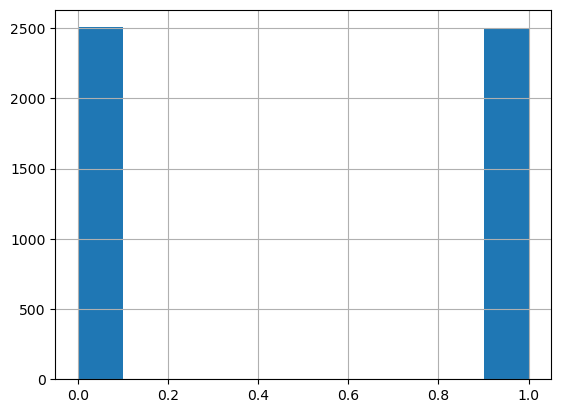

In [26]:
dataset1['distance_nose_to_lip_long'].hist()